In [1]:
library(tidyverse)
library(taxize)
library(ggtree)
library(arcadiathemeR)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
ggtree v3.10.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees wi

All custom fonts 'Suisse Int'l, Suisse Int'l Semi Bold, Suisse Int'l Medium, Suisse Int'l Mono' are successfully loaded.


In [2]:
setwd("..")

In [48]:
virus_colors <- c(
  "Adenoviridae" = "#F898AE",
  "Astroviridae" = "#73B5E3",
  "Herpesviridae" = "#FFB984",
  "Caliciviridae" = "#F5E4BE",
  "Poxviridae" = "#BABEE0",
  "Picornaviridae" = "#97CD78",
  "Potyviridae" = "#5088C5",
  "Coronaviridae" = "#F28360"
)

In [15]:
colnames(df)

[1] "nomburg_cluster_id"             "nomburg_cluster_representative"
 [3] "nomburg_protein_name"           "gene_name"                     
 [5] "ncbi_id"                        "virus"                         
 [7] "taxon_id"                       "nomburg_cluster_count"         
 [9] "superkingdom"                   "phylum"                        
[11] "class"                          "order"                         
[13] "family"                         "genus"                         
[15] "species.x"                      "structure_filepaths"           
[17] "species.y"                      "taxonomic_rank"

In [22]:
# Sample dataframe with NCBI taxonomy IDs and metadata
df <- read_tsv("outputs/viral/human/viral_structure_metadata.tsv", show_col_types = FALSE) %>%
  select(taxon_id, virus) %>%
  distinct() %>%
  group_by(taxon_id) %>%
  slice_head(n = 1) %>%
  ungroup()
#count_df <- read_tsv("num_eukaryote_matches.tsv", show_col_types = FALSE) 
#df <- left_join(df, count_df, by = c("organism" = "query_organism")) %>%
#  replace_na(list(num_matches = 0))

In [23]:
df

taxon_id,virus
<dbl>,<chr>
1280,Staphylococcus_aureus
10243,Cowpox_virus
10244,Monkeypox_virus
10245,Vaccinia_virus
10255,Variola_virus
10258,Orf_virus
10280,Molluscum_contagiosum_virus_subtype_1
10298,Human_alphaherpesvirus_1
10310,Human_alphaherpesvirus_2


In [ ]:
df %>%

In [24]:
# Get taxonomic classifications
classifications <- classification(df$taxon_id, db = "ncbi")

In [25]:
# Build a tree from classifications
tree_data <- class2tree(classifications)

Get all ranks and their taxIDs

Align taxonomy hierarchies...

Taxonomy alignment done!

Calculate distance matrix

Add node labels



In [26]:
# Extract species names
species_names <- sapply(classifications, function(x) {
  x$name[x$rank == "species"]
})

In [27]:
# Specify the taxonomic rank to color by (e.g., "phylum" or "family")
taxonomic_rank_tmp <- "family"

# Extract the specified taxonomic rank for each species
taxonomic_rank_names <- sapply(classifications, function(x) {
  rank_name <- x$name[x$rank == taxonomic_rank_tmp]
  if (length(rank_name) == 0) NA else rank_name
})

In [28]:
# Create a data frame mapping taxid to species name
taxid_species <- data.frame(taxon_id = as.numeric(names(classifications)), 
                            species = species_names,
                            taxonomic_rank = taxonomic_rank_names,
                            stringsAsFactors = FALSE)

In [29]:
taxid_species

,taxon_id,species,taxonomic_rank
,<dbl>,<chr>,<chr>
1280,1280,Staphylococcus aureus,Staphylococcaceae
10243,10243,Cowpox virus,Poxviridae
10244,10244,Monkeypox virus,Poxviridae
10245,10245,Vaccinia virus,Poxviridae
10255,10255,Variola virus,Poxviridae
10258,10258,Orf virus,Poxviridae
10280,10280,Molluscum contagiosum virus,Poxviridae
10298,10298,Simplexvirus humanalpha1,Orthoherpesviridae
10310,10310,Simplexvirus humanalpha2,Orthoherpesviridae


In [30]:
# Merge species names with original dataframe
df <- df %>%
  left_join(taxid_species, by = "taxon_id")

In [31]:
head(df)

taxon_id,virus,species,taxonomic_rank
<dbl>,<chr>,<chr>,<chr>
1280,Staphylococcus_aureus,Staphylococcus aureus,Staphylococcaceae
10243,Cowpox_virus,Cowpox virus,Poxviridae
10244,Monkeypox_virus,Monkeypox virus,Poxviridae
10245,Vaccinia_virus,Vaccinia virus,Poxviridae
10255,Variola_virus,Variola virus,Poxviridae
10258,Orf_virus,Orf virus,Poxviridae


In [33]:
rownames(df) <- df$virus

Warning message:
“Setting row names on a tibble is deprecated.”


## plot

In [36]:
# Create a data frame for the tip labels
tip_data <- data.frame(
  label = tree_data$phylo$tip.label,
  stringsAsFactors = FALSE
)

In [37]:
head(tip_data)

,label
,<chr>
1,Staphylococcus aureus
2,Cowpox virus
3,Monkeypox virus
4,Vaccinia virus
5,Variola virus
6,Orf virus


In [38]:
# Merge tip labels with metadata
tip_data <- tip_data %>%
  left_join(df, by = c("label" = "species"))

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


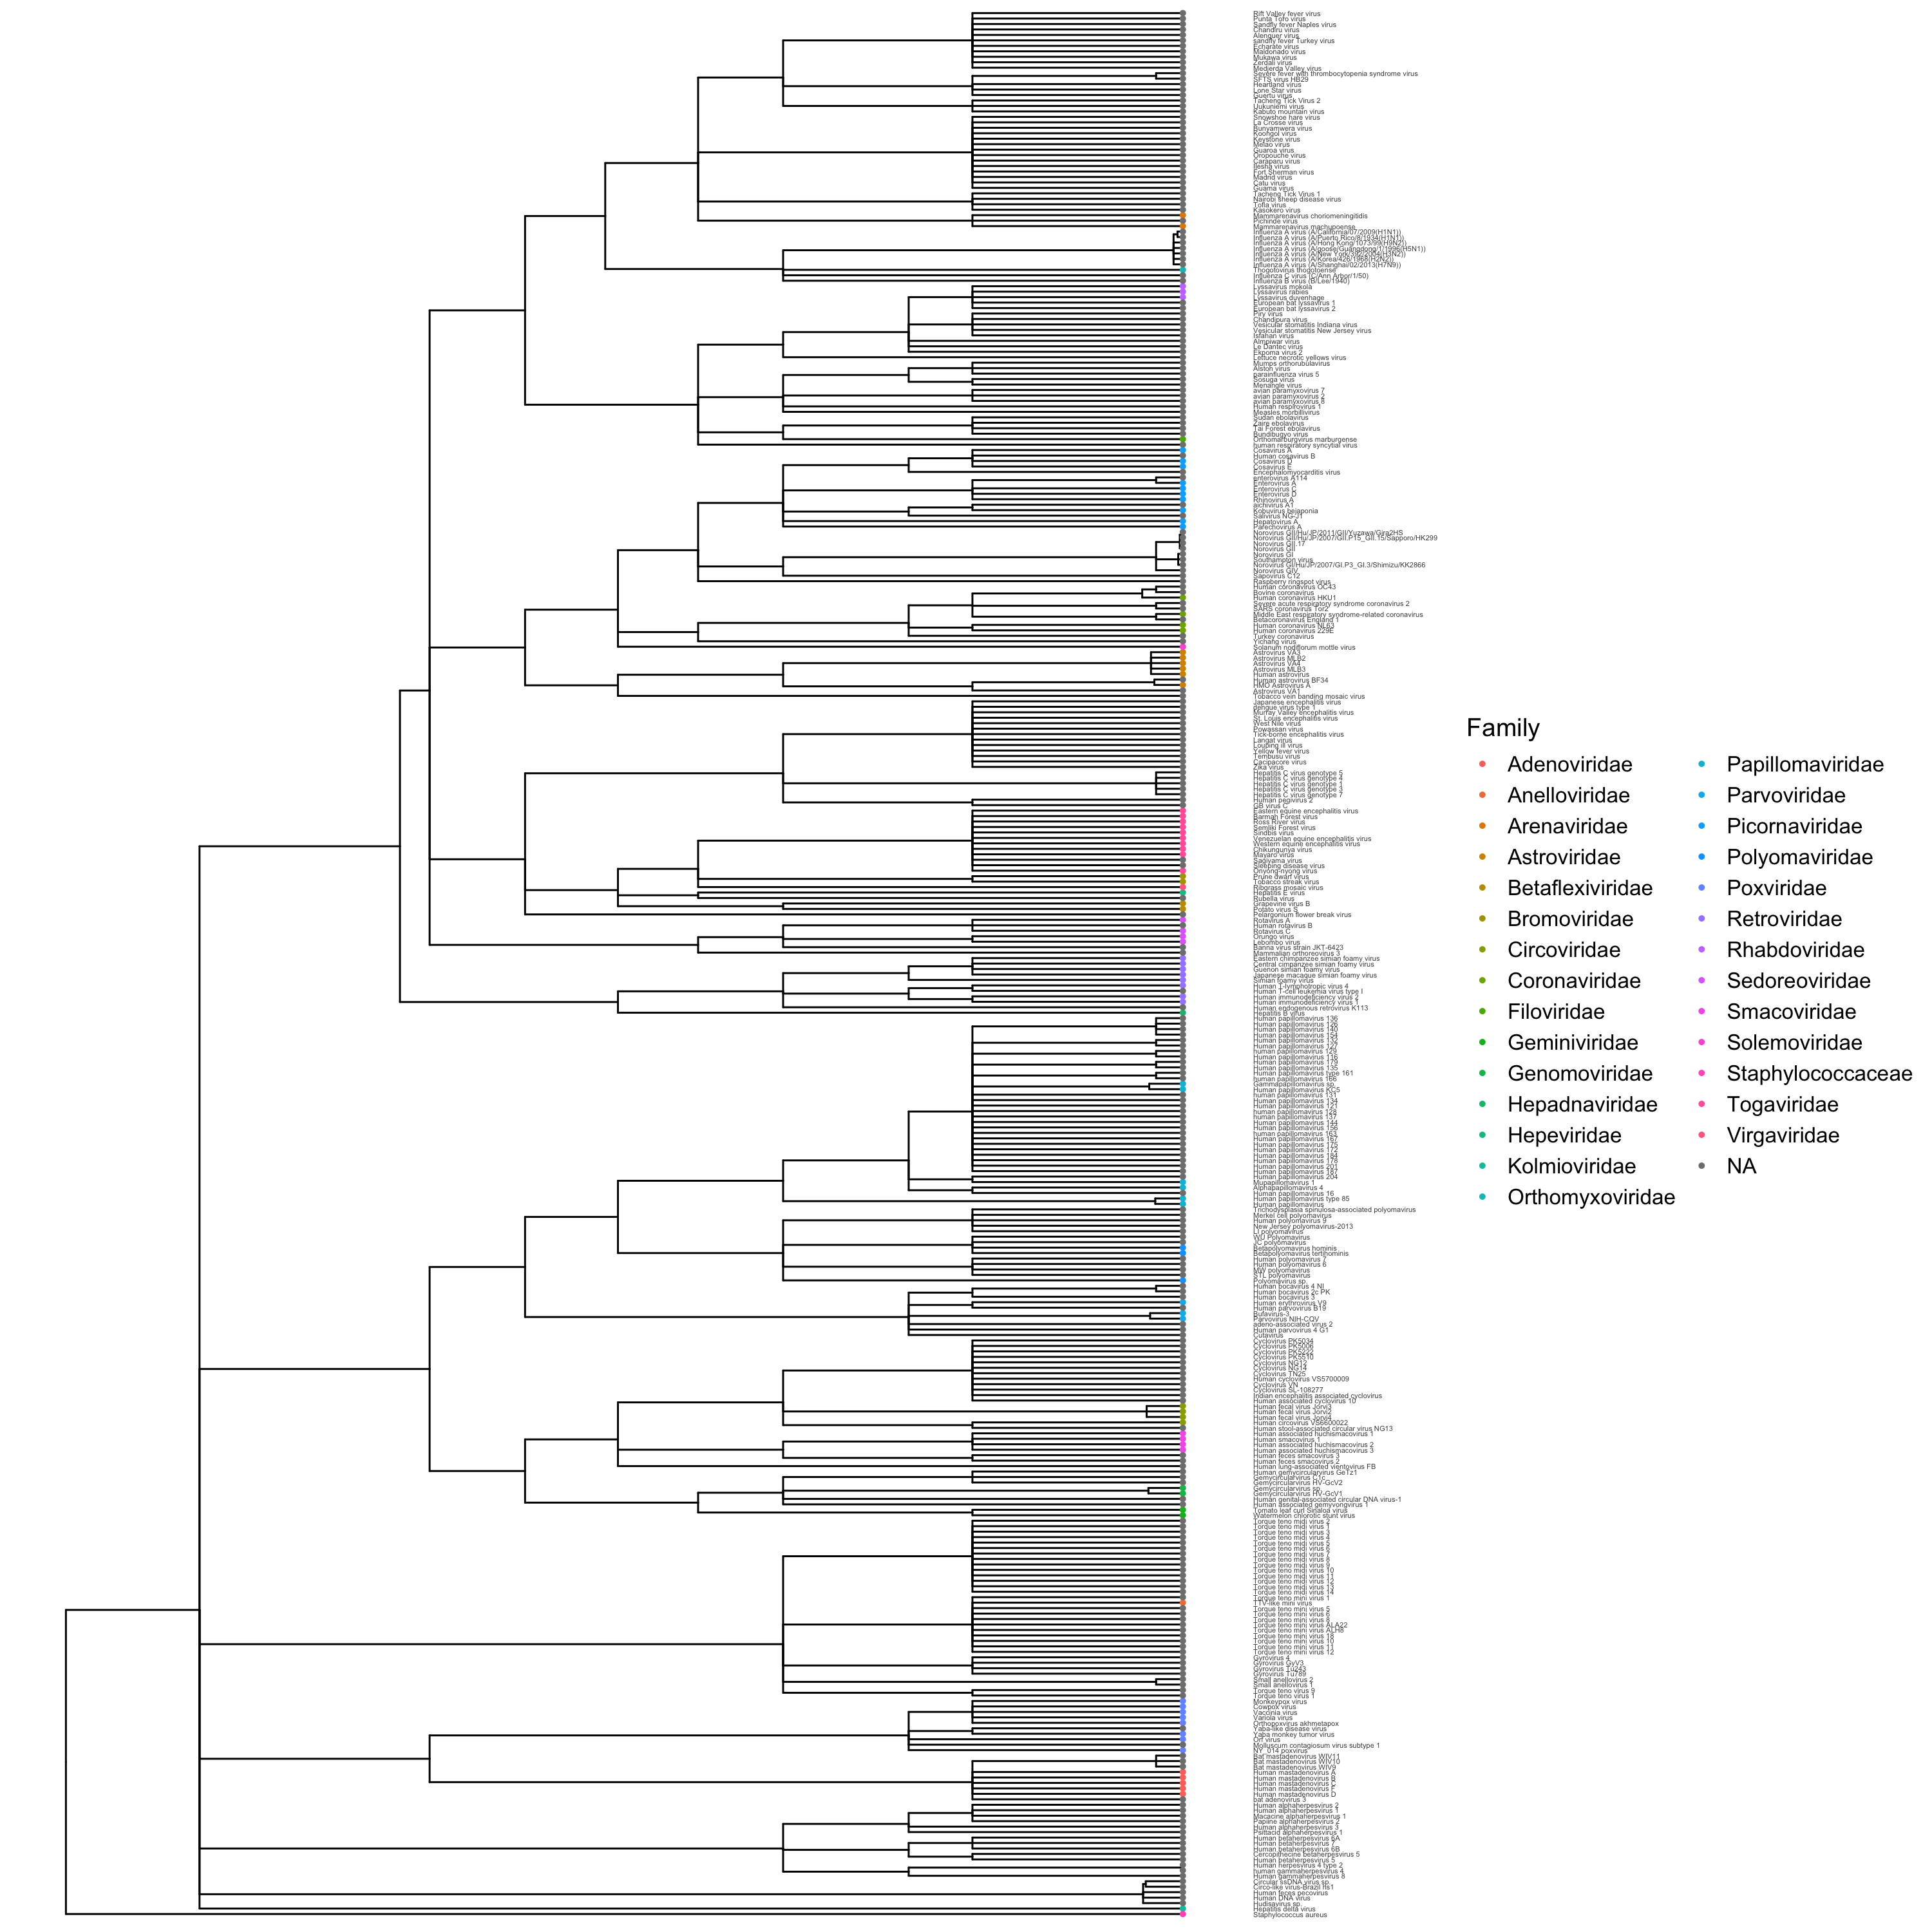

In [52]:
options(repr.plot.width = 15, repr.plot.height = 15, repr.plot.res = 200)

plt <- ggtree(tree_data$phylo) %<+% tip_data +
  geom_tiplab(aes(color = taxonomic_rank), hjust = -0.1, as_ylab = TRUE, size = 4) +
  geom_tippoint(aes(color = taxonomic_rank), size = 1) +
  labs(color = "Family") +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text(size = 14))
  #scale_color_manual(values = virus_colors)

plt

In [66]:
pdf("plt.pdf")
plt
dev.off()

pdf 
  2

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


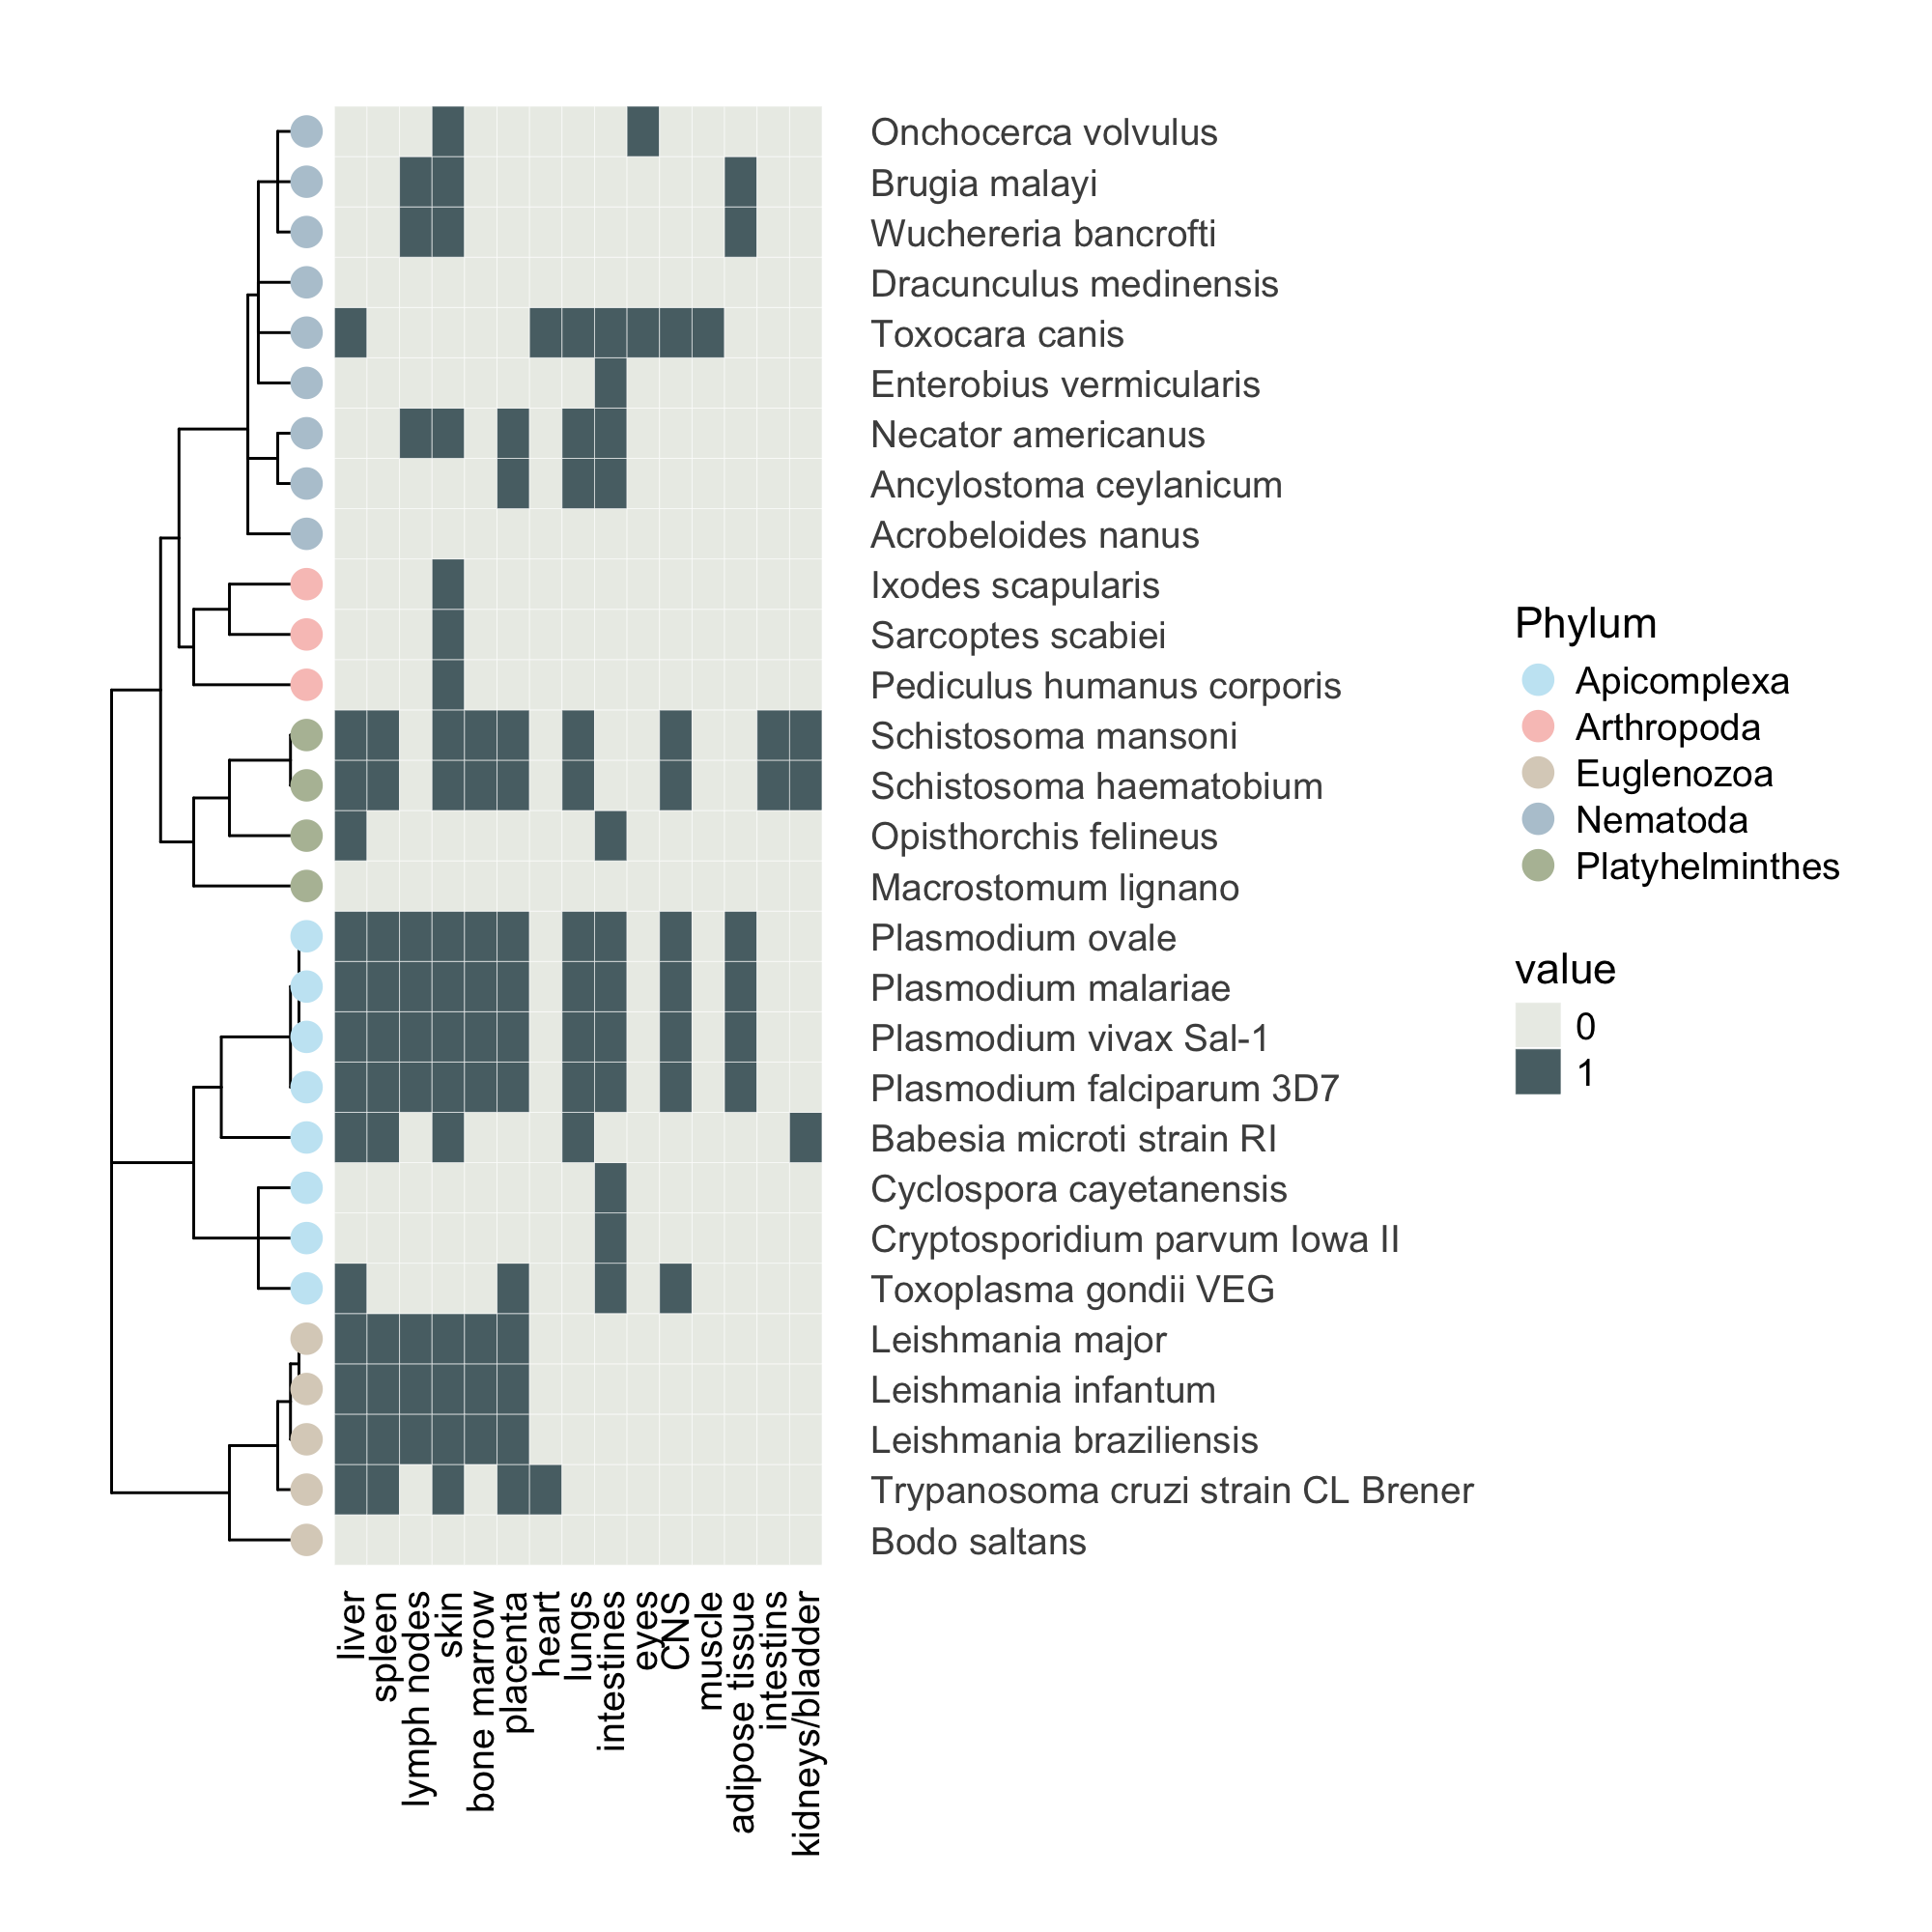

In [34]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 200)

plt_heatmap <- gheatmap(plt, heatmap_data, offset = 3, width = 2.5, hjust = 1,
         colnames_angle = 90, colnames_offset_y = 0, font.size = 5) +
  scale_fill_manual(values = c("0" = "#EBEDE8", "1" = "#596F74"), na.value = "grey80") +
  theme(legend.position = "right",
        plot.margin = unit(c(1, 1, 4, 1), "cm")) +
  coord_cartesian(clip = "off") 

plt_heatmap

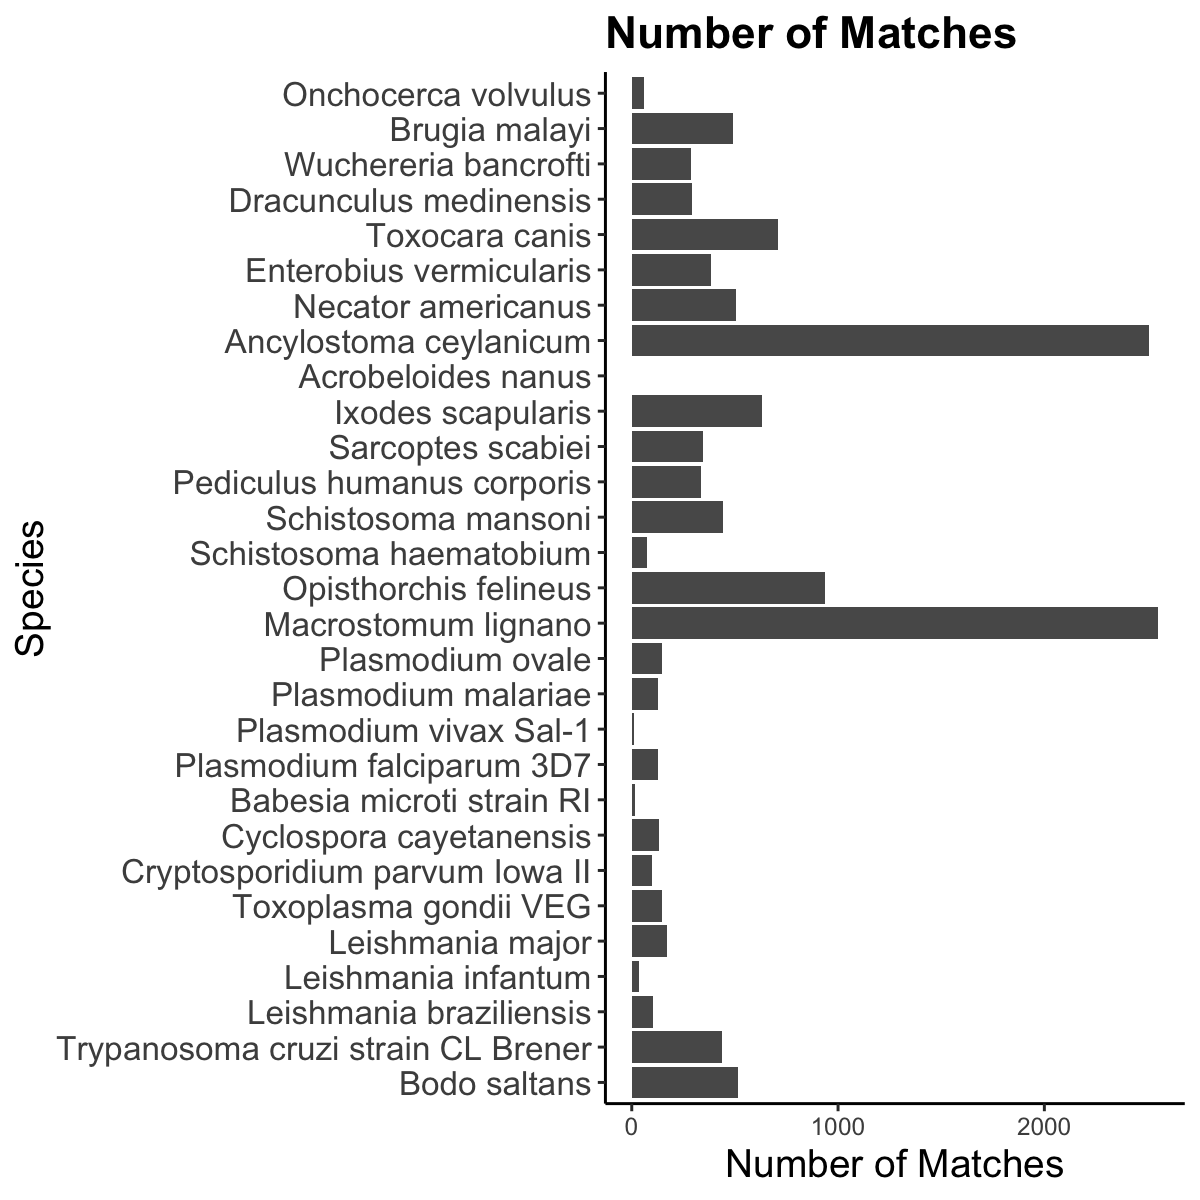

In [68]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 200)

species_order <- c(
  "Onchocerca volvulus",
  "Brugia malayi",
  "Wuchereria bancrofti",
  "Dracunculus medinensis",
  "Toxocara canis",
  "Enterobius vermicularis",
  "Necator americanus",
  "Ancylostoma ceylanicum",
  "Acrobeloides nanus",
  "Ixodes scapularis",
  "Sarcoptes scabiei",
  "Pediculus humanus corporis",
  "Schistosoma mansoni",
  "Schistosoma haematobium",
  "Opisthorchis felineus",
  "Macrostomum lignano",
  "Plasmodium ovale",
  "Plasmodium malariae",
  "Plasmodium vivax Sal-1",
  "Plasmodium falciparum 3D7",
  "Babesia microti strain RI",
  "Cyclospora cayetanensis",
  "Cryptosporidium parvum Iowa II",
  "Toxoplasma gondii VEG",
  "Leishmania major",
  "Leishmania infantum",
  "Leishmania braziliensis",
  "Trypanosoma cruzi strain CL Brener",
  "Bodo saltans"
)

tip_data$label <- factor(tip_data$label, levels = rev(species_order))
ggplot(tip_data, aes(x = label, y = num_matches)) +
  geom_col() +
  coord_flip() +
  theme_classic() +
  labs(x = "Species", y = "Number of Matches", title = "Number of Matches") +
  theme(
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )

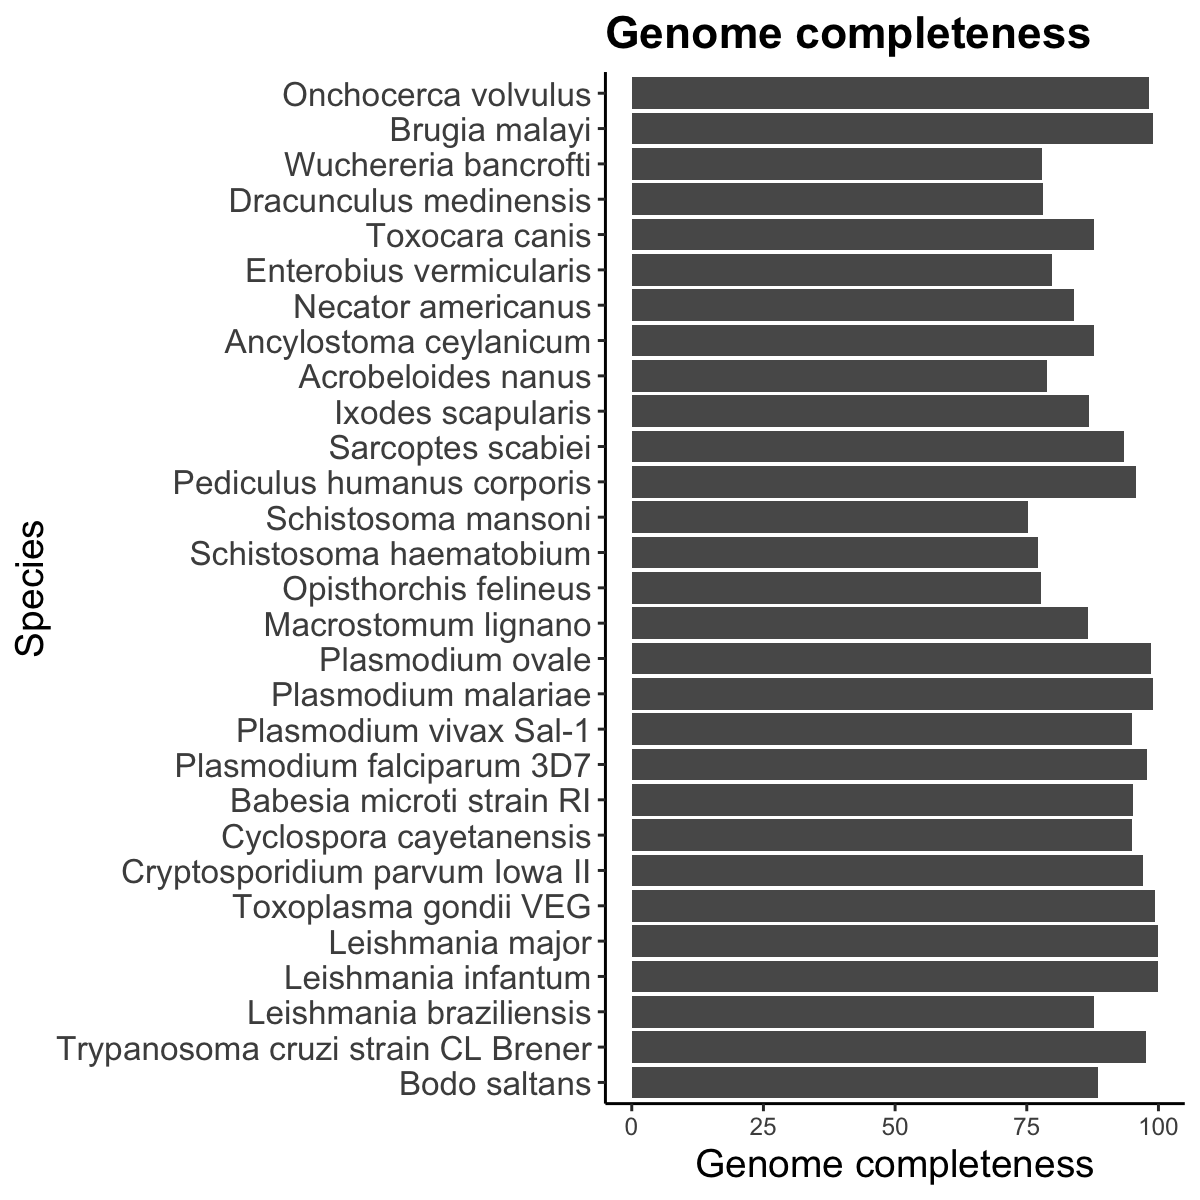

In [71]:
#tip_data$label <- factor(tip_data$label, levels = rev(species_order))
ggplot(tip_data, aes(x = label, y = busco_complete)) +
  geom_col() +
  coord_flip() +
  theme_classic() +
  labs(x = "Species", y = "Genome completeness", title = "Genome completeness") +
  theme(
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )

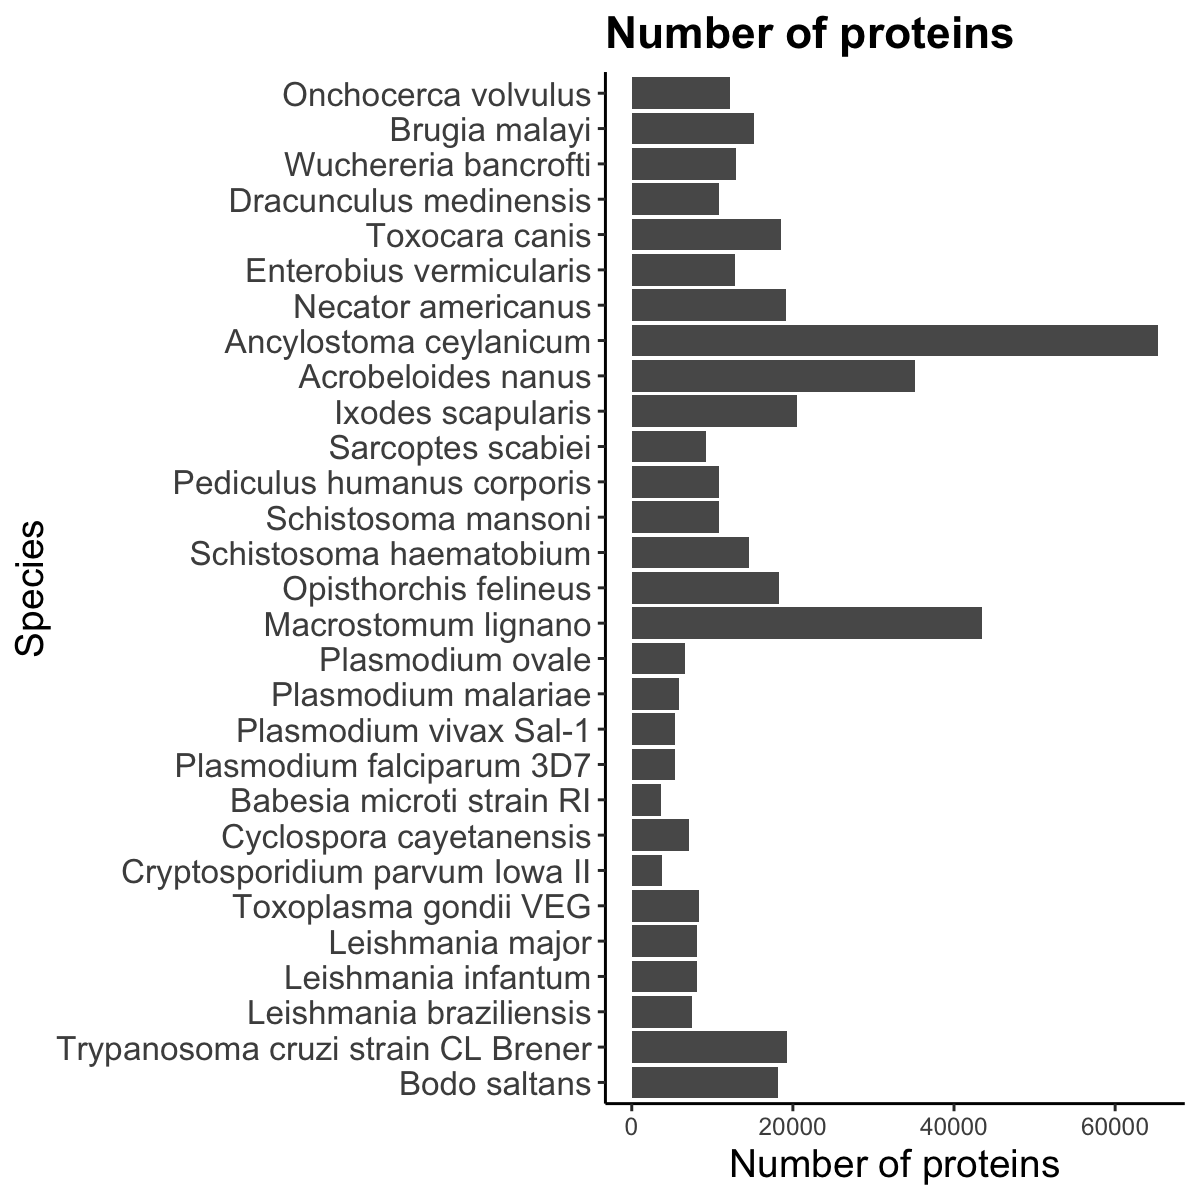

In [72]:
ggplot(tip_data, aes(x = label, y = protein_count)) +
  geom_col() +
  coord_flip() +
  theme_classic() +
  labs(x = "Species", y = "Number of proteins", title = "Number of proteins") +
  theme(
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


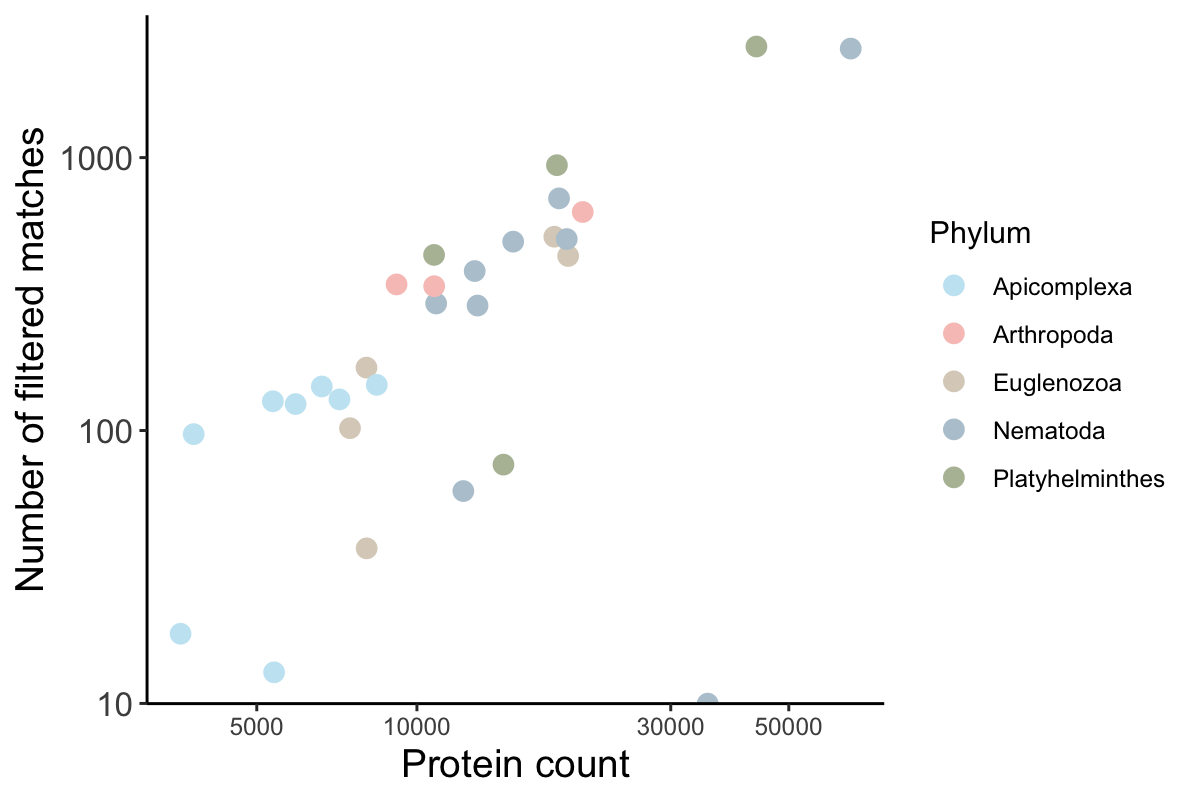

In [82]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)

ggplot(tip_data, aes(x = protein_count, y = num_matches, color = taxonomic_rank)) +
  geom_point(size = 3) +
  theme_classic() +
  labs(x = "Protein count", y = "Number of filtered matches", color = "Phylum") +
  theme(
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  ) +
    scale_color_arcadia("secondary") +
  scale_y_log10() +
  scale_x_log10()

In [75]:
colnames(tip_data)

[1] "label"                         "organism"                     
 [3] "parasite"                      "parasite_type"                
 [5] "endoparasite_type"             "experimental_design"          
 [7] "note"                          "infects_humans"               
 [9] "average_length_of_infection"   "human_infection_type"         
[11] "definitive_host"               "intermediate_host"            
[13] "typical_human_infection_route" "dpdx"                         
[15] "dpdx link"                     "metadata_checked"             
[17] "parasite_infection_path"       "parasite_infection_tissues"   
[19] "tissue_tropism"                "tissue_tropism_reference"     
[21] "proteome_id"                   "organism_id"                  
[23] "protein_count"                 "busco"                        
[25] "cpd"                           "taxon_mnemonic"               
[27] "taxonomic_lineage"             "components"                   
[29] "genome_assembly_id"            "genome_representation"        
[31] "busco_complete"                "busco_single"                 
[33] "busco_duplicate"               "busco_fragment"               
[35] "busco_missing"                 "busco_n"                      
[37] "num_matches"                   "taxonomic_rank"               
[39] "liver"                         "spleen"                       
[41] "lymph nodes"                   "skin"                         
[43] "bone marrow"                   "placenta"                     
[45] "heart"                         "lungs"                        
[47] "intestines"                    "eyes"                         
[49] "CNS"                           "muscle"                       
[51] "adipose tissue"                "intestins"                    
[53] "kidneys/bladder"

In [62]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/tidyjupyter/lib/libopenblasp-r0.3.26.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/Los_Angeles
tzcode source: internal

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggstance_0.3.7      ggnewscale_0.5.0    arcadiathemeR_0.1.0
 [4] ggtree_3.10.0       taxize_0.9.100.1    lubridate_1.9.3    
 [7] forcats_1.0.0       stringr_1.5.1       dplyr_1.1.4        
[10] purrr_1.0.2         readr_2.1.5         tidyr_1.3.1        
[13] tibble_3.2.1        ggplot2_3.5.1       tidyverse_2.0.0    

loaded via a namespace (and not attached):
 [1] tidyselect_1.2.0   IRdisplay_1.1      farver_2.1.2       urltools_1.7.3    
 [5] fastmap_1.1.1      l